In [5]:
import mtcnn
import cv2
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from retinaface import RetinaFace
import numpy as np
import tensorflow_addons as tfa
from skimage import transform
import PIL
from sklearn.model_selection import train_test_split

In [3]:
#h5py == 2.10

In [157]:
img = cv2.imread('./face_image/tiger.jpg')
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
pixels = np.asarray(img)
print(pixels)

[[[128  86  44]
  [120  78  36]
  [105  63  21]
  ...
  [ 71  46  26]
  [ 83  61  40]
  [ 83  62  45]]

 [[113  71  29]
  [107  65  23]
  [109  67  25]
  ...
  [ 83  58  38]
  [ 88  63  43]
  [ 68  47  28]]

 [[111  72  31]
  [105  66  25]
  [124  85  44]
  ...
  [101  74  53]
  [ 93  66  45]
  [ 71  49  28]]

 ...

 [[101 102  44]
  [222 222 160]
  [203 195 130]
  ...
  [135 130  49]
  [188 185 104]
  [190 192 108]]

 [[149 150  90]
  [139 139  75]
  [175 168 100]
  ...
  [204 199 117]
  [224 222 139]
  [145 146  66]]

 [[171 173 110]
  [204 205 139]
  [ 87  80  10]
  ...
  [166 164  77]
  [177 176  93]
  [105 107  32]]]


In [153]:
detector = mtcnn.MTCNN()

In [158]:
results = detector.detect_faces(pixels)

In [161]:
print(len(results))
x1 , y1 ,w , h=results[0]['box']
x1 , y1 = abs(x1) , abs(y1)
x2 , y2 = x1 + w , y1+h
x1 , y1 , x2 , y2

0


IndexError: list index out of range

In [52]:
face = pixels[y1:y2 , x1:x2]
image = PIL.Image.fromarray(face)
image = image.resize((160,160))
face_array = np.asarray(image)

In [39]:
detector = mtcnn.MTCNN()
def face_MTCNN(filename , resize = (160,160) ):
    global detector
    img = PIL.Image.open(filename)
    img = img.convert('RGB')
    pixels = np.asarray(img)
#     print(pixels)
    results = detector.detect_faces(pixels)
    x1 , y1 ,w , h=results[0]['box']
    x1 , y1 = abs(x1) , abs(y1)
    x2 , y2 = x1 + w , y1+h
    face = pixels[y1:y2 , x1:x2]
    image = PIL.Image.fromarray(face)
    image = image.resize(resize)
    face_array = np.asarray(image)
    return face_array

In [21]:
detector = mtcnn.MTCNN()
def face_MTCNN(dirPath='./data/' , resize = (160,160) ):
    global detector
    global label_dict
    img_list = []
    label = []
    label_dict=dict()
    for num,file in enumerate(os.listdir(dirPath)):
        label_dict[file] = num
    i = 1
    for file in os.listdir(dirPath) :
        Path = dirPath + file
        for f in  os.listdir(Path) :
            if os.path.isfile(os.path.join(Path, f)):
                img = cv2.imread(Path + '/'+ f)
                img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
                pixels = np.asarray(img)
                results = detector.detect_faces(pixels)
                x1 , y1 ,w , h=results[0]['box']
                x1 , y1 = abs(x1) , abs(y1)
                x2 , y2 = x1 + w , y1+h
                face = pixels[y1:y2 , x1:x2]
                image = PIL.Image.fromarray(face)
                image = image.resize(resize)
                face_array = np.asarray(image)
                img_list.append(face_array)
                label.append(label_dict[file])
                print(i , f , face_array.shape)
                i += 1
                for _ in range(5):
                    up_img = tf.image.random_flip_up_down(face_array)
                    right_img = tf.image.random_flip_left_right(up_img)
                    img_list.append(right_img)
                    label.append(label_dict[file])
                    i += 1
                    print(i , f , right_img.shape)
    train = np.asarray(img_list)
    target = np.asarray(label)   
    return train , target
    
    
    

In [22]:
train , target = face_MTCNN()

1 Abdullah_0003.jpg (160, 160, 3)
3 Abdullah_0003.jpg (160, 160, 3)
4 Abdullah_0003.jpg (160, 160, 3)
5 Abdullah_0003.jpg (160, 160, 3)
6 Abdullah_0003.jpg (160, 160, 3)
7 Abdullah_0003.jpg (160, 160, 3)
7 Abdullah_Gul_0005.jpg (160, 160, 3)
9 Abdullah_Gul_0005.jpg (160, 160, 3)
10 Abdullah_Gul_0005.jpg (160, 160, 3)
11 Abdullah_Gul_0005.jpg (160, 160, 3)
12 Abdullah_Gul_0005.jpg (160, 160, 3)
13 Abdullah_Gul_0005.jpg (160, 160, 3)
13 Akhmed_Zakayev_0003.jpg (160, 160, 3)
15 Akhmed_Zakayev_0003.jpg (160, 160, 3)
16 Akhmed_Zakayev_0003.jpg (160, 160, 3)
17 Akhmed_Zakayev_0003.jpg (160, 160, 3)
18 Akhmed_Zakayev_0003.jpg (160, 160, 3)
19 Akhmed_Zakayev_0003.jpg (160, 160, 3)
19 Brad_Banks_0001.jpg (160, 160, 3)
21 Brad_Banks_0001.jpg (160, 160, 3)
22 Brad_Banks_0001.jpg (160, 160, 3)
23 Brad_Banks_0001.jpg (160, 160, 3)
24 Brad_Banks_0001.jpg (160, 160, 3)
25 Brad_Banks_0001.jpg (160, 160, 3)
25 Brendan_Fraser_0001.jpg (160, 160, 3)
27 Brendan_Fraser_0001.jpg (160, 160, 3)
28 Brendan_Fra

37 eric.jpg (160, 160, 3)
39 eric.jpg (160, 160, 3)
40 eric.jpg (160, 160, 3)
41 eric.jpg (160, 160, 3)
42 eric.jpg (160, 160, 3)
43 eric.jpg (160, 160, 3)


43 jay3.jpg (160, 160, 3)
45 jay3.jpg (160, 160, 3)
46 jay3.jpg (160, 160, 3)
47 jay3.jpg (160, 160, 3)
48 jay3.jpg (160, 160, 3)
49 jay3.jpg (160, 160, 3)
49 John_Robbins_0001.jpg (160, 160, 3)
51 John_Robbins_0001.jpg (160, 160, 3)
52 John_Robbins_0001.jpg (160, 160, 3)
53 John_Robbins_0001.jpg (160, 160, 3)
54 John_Robbins_0001.jpg (160, 160, 3)
55 John_Robbins_0001.jpg (160, 160, 3)
55 Jose_Carlo_Fernandez_0001.jpg (160, 160, 3)
57 Jose_Carlo_Fernandez_0001.jpg (160, 160, 3)
58 Jose_Carlo_Fernandez_0001.jpg (160, 160, 3)
59 Jose_Carlo_Fernandez_0001.jpg (160, 160, 3)
60 Jose_Carlo_Fernandez_0001.jpg (160, 160, 3)
61 Jose_Carlo_Fernandez_0001.jpg (160, 160, 3)
61 JT_Snow_0001.jpg (160, 160, 3)
63 JT_Snow_0001.jpg (160, 160, 3)
64 JT_Snow_0001.jpg (160, 160, 3)
65 JT_Snow_0001.jpg (160, 160, 3)
66 JT_Snow_0001.jpg (160, 160, 3)
67 JT_Snow_0001.jpg (160, 160, 3)


67 lin.jpg (160, 160, 3)
69 lin.jpg (160, 160, 3)
70 lin.jpg (160, 160, 3)
71 lin.jpg (160, 160, 3)
72 lin.jpg (160, 160, 3)
73 lin.jpg (160, 160, 3)
73 Mike_Helton_0002.jpg (160, 160, 3)
75 Mike_Helton_0002.jpg (160, 160, 3)
76 Mike_Helton_0002.jpg (160, 160, 3)
77 Mike_Helton_0002.jpg (160, 160, 3)
78 Mike_Helton_0002.jpg (160, 160, 3)
79 Mike_Helton_0002.jpg (160, 160, 3)
79 Mike_Scioscia_0002.jpg (160, 160, 3)
81 Mike_Scioscia_0002.jpg (160, 160, 3)
82 Mike_Scioscia_0002.jpg (160, 160, 3)
83 Mike_Scioscia_0002.jpg (160, 160, 3)
84 Mike_Scioscia_0002.jpg (160, 160, 3)
85 Mike_Scioscia_0002.jpg (160, 160, 3)
85 Mireya_Moscoso_0003.jpg (160, 160, 3)
87 Mireya_Moscoso_0003.jpg (160, 160, 3)
88 Mireya_Moscoso_0003.jpg (160, 160, 3)
89 Mireya_Moscoso_0003.jpg (160, 160, 3)
90 Mireya_Moscoso_0003.jpg (160, 160, 3)
91 Mireya_Moscoso_0003.jpg (160, 160, 3)
91 Miroljub_0002.jpg (160, 160, 3)
93 Miroljub_0002.jpg (160, 160, 3)
94 Miroljub_0002.jpg (160, 160, 3)
95 Miroljub_0002.jpg (160, 160,

145 Zhong_Nanshan_0001.jpg (160, 160, 3)
147 Zhong_Nanshan_0001.jpg (160, 160, 3)
148 Zhong_Nanshan_0001.jpg (160, 160, 3)
149 Zhong_Nanshan_0001.jpg (160, 160, 3)
150 Zhong_Nanshan_0001.jpg (160, 160, 3)
151 Zhong_Nanshan_0001.jpg (160, 160, 3)
151 Zhu_Rongji_0002.jpg (160, 160, 3)
153 Zhu_Rongji_0002.jpg (160, 160, 3)
154 Zhu_Rongji_0002.jpg (160, 160, 3)
155 Zhu_Rongji_0002.jpg (160, 160, 3)
156 Zhu_Rongji_0002.jpg (160, 160, 3)
157 Zhu_Rongji_0002.jpg (160, 160, 3)
157 Zoe_Ball_0001.jpg (160, 160, 3)
159 Zoe_Ball_0001.jpg (160, 160, 3)
160 Zoe_Ball_0001.jpg (160, 160, 3)
161 Zoe_Ball_0001.jpg (160, 160, 3)
162 Zoe_Ball_0001.jpg (160, 160, 3)
163 Zoe_Ball_0001.jpg (160, 160, 3)
163 Zurab_Tsereteli_0001.jpg (160, 160, 3)
165 Zurab_Tsereteli_0001.jpg (160, 160, 3)
166 Zurab_Tsereteli_0001.jpg (160, 160, 3)
167 Zurab_Tsereteli_0001.jpg (160, 160, 3)
168 Zurab_Tsereteli_0001.jpg (160, 160, 3)
169 Zurab_Tsereteli_0001.jpg (160, 160, 3)
169 Zydrunas_Ilgauskas_0001.jpg (160, 160, 3)
171 Zy

train: (174, 160, 160, 3)
label: (174,)
English


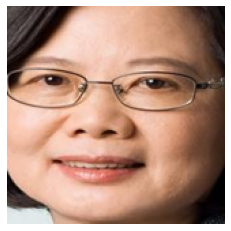

In [34]:
print('train:',train.shape)
print('label:',target.shape)
dict_new = {value:key for key,value in label_dict.items()}
plt.axis('off')
num = 30
print(dict_new[target[num]])
plt.imshow(train[num] /255.0)

In [127]:
x_train , x_test ,y_train , y_test =  train_test_split(train , target , train_size = 0.8 ,random_state=1)

In [128]:
print('x_train:'  , x_train.shape)
print('y_train:' , y_train.shape)
print('x_test:' ,x_test.shape)

x_train: (139, 160, 160, 3)
y_train: (139,)
x_test: (35, 160, 160, 3)


In [129]:
face_model = tf.keras.models.load_model('./facenet_keras.h5' ,  compile=False)

In [130]:
def face_pixes(x):
    train = x.astype('float32')
    mean , std = train.mean() , train.std()
    face_pixes = (train - mean) / std
    return face_pixes


In [131]:
x_train_pixes = face_pixes(x_train)
x_test_pixes = face_pixes(x_test)

In [132]:
x_train_yhat = face_model.predict(x_train_pixes)
x_test_yhat  = face_model.predict(x_test_pixes)

In [133]:
#將臉部特徵轉換為128個特徵向量
print('x_train:' , x_train_yhat.shape)
print('x_test:' , x_test_yhat.shape)

x_train: (139, 128)
x_test: (35, 128)


In [134]:
#機器學習分類模型
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [135]:
model = SVC(kernel = 'linear')
model.fit(x_train_yhat  , y_train)

SVC(kernel='linear')

In [136]:
y_pred =  model.predict(x_test_yhat)
print('score:' , accuracy_score(y_test , y_pred ))

score: 0.9714285714285714


In [137]:
#預測單張照片
face_model = tf.keras.models.load_model('./facenet_keras.h5' ,  compile=False)
def facenet_one_photo(img , resize=(160,160)):
    global face_model
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    pixels = np.asarray(img)
    results = detector.detect_faces(pixels)
    x1 , y1 ,w , h=results[0]['box']
    x1 , y1 = abs(x1) , abs(y1)
    x2 , y2 = x1 + w , y1+h
    face = pixels[y1:y2 , x1:x2]
    image = PIL.Image.fromarray(face)
    image = image.resize(resize)
    face_array = np.asarray(image)
    face_array = face_array.astype('float32')
    mean , std = face_array.mean() , face_array.std()
    face_pixes = (face_array - mean) / std
    face_pixes = np.expand_dims(face_pixes, axis=0)
    y_hat = face_model.predict(face_pixes)
    return y_hat


In [167]:
img = cv2.imread('./face_image/sing.jpg')
photo_hat = facenet_one_photo(img)
p_hat = model.predict(photo_hat)

In [221]:
def Euclidean_distance(dict1 , dict2):
    E_list = []
    for a, b  in zip(dict1, dict2):
        Euclidean = np.sqrt(np.sum((a - b) ** 2))
        E_list.append(Euclidean)
    return  np.array(E_list)

In [190]:
def photo_mnn(dirPath='./data/' , resize = (160,160) ):
    photo_list   = []
    for file in os.listdir(dirPath) :
        Path = dirPath + file
        for f in  os.listdir(Path) :
            if os.path.isfile(os.path.join(Path, f)):
                img = cv2.imread(Path + '/'+ f)
                img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
                pixels = np.asarray(img)
                results = detector.detect_faces(pixels)
                x1 , y1 ,w , h=results[0]['box']
                x1 , y1 = abs(x1) , abs(y1)
                x2 , y2 = x1 + w , y1+h
                face = pixels[y1:y2 , x1:x2]
                image = PIL.Image.fromarray(face)
                image = image.resize(resize)
                face_array = np.asarray(image)
                mean , std = face_array.mean() , face_array.std()
                face_pixes = (face_array - mean) / std
                face_pixes = np.expand_dims(face_pixes, axis=0)
                y_hat = face_model.predict(face_pixes)
                photo_list.append(y_hat)
    photo_list = np.asarray(photo_list)
    return photo_list    

In [191]:
photo_list = photo_mnn()
photo_list.shape

(29, 1, 128)

In [252]:
e_list = []
p_hat = None
img = cv2.imread('./face_image/english.jpg')
photo_hat = facenet_one_photo(img)

for p in photo_list :
    e = round(np.linalg.norm(photo_hat[0] - p[0]), 2)
    e_list.append(e)

t = 20
for i , e_tag in enumerate(e_list):
    if e_tag < 9 :
        print(e_tag)
        print(i)
        p_hat = model.predict(photo_hat)
        print(p_hat)
        break
        
if p_hat !=None:
    print('辨識結果:' , dict_new[int(p_hat)])
else:
    print('沒有此人' )
        


5.68
5
[5]
辨識結果: English


In [ ]:
detector = mtcnn.MTCNN()
def face_MTCNN(dirPath='./data/' , resize = (160,160) ):
    global detector
    global label_dict
    img_list = []
    label = []
    label_dict=dict()
    for num,file in enumerate(os.listdir(dirPath)):
        label_dict[file] = num
    i = 1
    for file in os.listdir(dirPath) :
        Path = dirPath + file
        for f in  os.listdir(Path) :
            if os.path.isfile(os.path.join(Path, f)):
                img = cv2.imread(Path + '/'+ f)
                img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
                pixels = np.asarray(img)
                results = detector.detect_faces(pixels)
                x1 , y1 ,w , h=results[0]['box']
                x1 , y1 = abs(x1) , abs(y1)
                x2 , y2 = x1 + w , y1+h
                face = pixels[y1:y2 , x1:x2]
                image = PIL.Image.fromarray(face)
                image = image.resize(resize)
                face_array = np.asarray(image)
                img_list.append(face_array)
                label.append(label_dict[file])
                print(i , f , face_array.shape)
                i += 1
                for _ in range(5):
                    up_img = tf.image.random_flip_up_down(face_array)
                    right_img = tf.image.random_flip_left_right(up_img)
                    img_list.append(right_img)
                    label.append(label_dict[file])
                    i += 1
                    print(i , f , right_img.shape)
    train = np.asarray(img_list)
    target = np.asarray(label)   
    return train , target
